## Objective
* Exploratory Analysis 
* Visualizations

## Context
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Metadata

Some explanation around the attributes (world-happiness-report.csv)

"Life Ladder" - The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. (https://en.wikipedia.org/wiki/World_Happiness_Report)

"Log GDP per Capita" - Per capita gross domestic product (GDP) is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population. (https://www.investopedia.com/terms/p/per-capita-gdp.asp)


## Visualizations

All the visualizations are done in Plotly

Map Box Scatter plot - to visualize happiness indicator on world map. Added Geo locations to the historical Happiness data. Used Map box Api to plot this one. The token can be generated at https://www.mapbox.com/

Tree Map - to compare Happiness score at region level

Scatter Plot - to illustrate the happiness indicator trend over the years

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly as plt
import plotly.figure_factory as ff
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
regions = "/kaggle/input/iso-country-codes-and-regions/CountryCodesRegions.csv"
ds_hist = "/kaggle/input/world-happiness-report-2021/world-happiness-report.csv"
ds_2021 = "/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv"
ds_latlong = "/kaggle/input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv"

df_latlong = pd.read_csv(ds_latlong)
df_historical = pd.read_csv(ds_hist)
df_2021 = pd.read_csv(ds_2021)
df_regions = pd.read_csv(regions)

df_latlong = df_latlong[["country", "latitude", "longitude", "country_code"]]


In [ ]:
# code to add geo location to historical data
def country(data):
    if data["Country name"] == 'South Sudan':
        return 'Sudan'
    elif data["Country name"] == 'North Macedonia':
        return 'Macedonia [FYROM]'
    elif data["Country name"] == 'Somaliland region':
        return 'Somalia'
    elif data["Country name"] == 'Myanmar':
        return 'Myanmar [Burma]'
    elif data["Country name"] == 'Congo (Brazzaville)':
        return 'Congo [Republic]'
    elif data["Country name"] == 'Congo (Kinshasa)':
        return 'Congo [DRC]'
    elif data["Country name"] == 'Hong Kong S.A.R. of China':
        return 'Hong Kong'
    elif data["Country name"] == 'Taiwan Province of China':
        return 'Taiwan'
    elif data["Country name"] == 'North Cyprus':
        return 'North Cyprus'
    else:
        return data['Country name']
 
df_historical['country'] = df_historical.apply(country, axis=1) 

data = pd.merge(df_historical, df_latlong, on='country', how='left')
data.loc[(data['Country name'] == 'Ivory Coast'),'country']='Ivory Coast'
data.loc[(data['Country name'] == 'Ivory Coast'),'latitude']= 5.345317
data.loc[(data['Country name'] == 'Ivory Coast'),'longitude']= -4.024429

data.loc[(data['Country name'] == 'North Cyprus'),'latitude']= 35.126413
data.loc[(data['Country name'] == 'North Cyprus'),'longitude']= 33.429859


data.rename(columns = {"country_code" : "ISOALPHA2"}, inplace = True)

data = pd.merge(data, df_regions[["ISOALPHA2", "Region" ]], on='ISOALPHA2', how='left')
data.loc[(data['Country name'] == 'Kosovo'),'Region']='Europe'
data.loc[(data['Country name'] == 'North Cyprus'),'Region']='Asia'
data = data.astype({"year": str})

In [ ]:
# Scatter plot
def mapboxplot(data):
    token=<give your mapbox token here>
    px.set_mapbox_access_token(token)
    dataset = data

    fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", color="Life Ladder", size="Life Ladder", 
        color_continuous_scale=px.colors.sequential.Blackbody, color_discrete_sequence=px.colors.qualitative.Bold, size_max=15, zoom=5,
        hover_data={"Country": dataset["country"], "latitude": False, "longitude": False, "year": False}, animation_frame="year", opacity=.5)

    fig.update_layout(mapbox = {'style': "dark", 'zoom': 1},font=dict(family="Open Sans", size=18, color="#1D617A"),
        title_text='Happiness Indicator Across Globe', title_x=0.5,title_y=.98,template="plotly_dark", legend_title="Stock Code", legend_font=dict(family="Open Sans", size=12),
        legend_borderwidth=1, legend_bordercolor="#1D617A", legend_title_font=dict(family="Open Sans", size=14),
        margin=dict(l=0, r=0, t=0, b=0), legend_x=0, legend_bgcolor="rgba(0,0,0,0)")

    return fig

fig = mapboxplot(data)
fig.show()

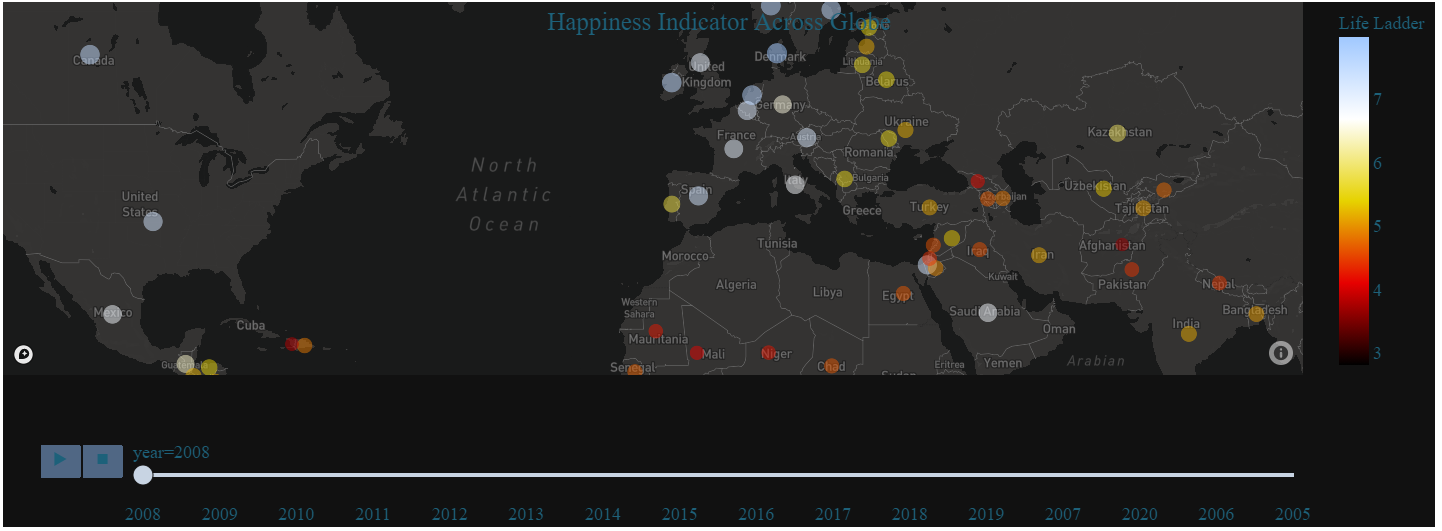

In [ ]:
# Treemap to compare Happiness Indicator in a particular year
def treemapplot(data, year):
    dataset = data[['Region', 'country', 'year', 'Life Ladder']]
    dataset = dataset[dataset["year"] == year]
    dataset["world"] = "World"
    title = "Happiness Indicator Comparison {}".format(year)
    fig = px.treemap(dataset, path=['world', 'Region', 'country'], values='Life Ladder',
                  color='Life Ladder', 
                  hover_data={"Life Ladder": False, "Happiness Indicator": dataset["Life Ladder"], "country": False},
                  color_continuous_scale='RdBu',
                  color_discrete_sequence=px.colors.qualitative.Alphabet
                  )
    fig.update_layout(title_text=title, title_x=0.5, title_y=.98, font=dict(family="Open Sans", size=18, color="#1D617A"),
        template="plotly_dark",margin=dict(l=0, r=0, t=0, b=0))

    return fig

year = "2015"   
fig = treemapplot(data, year)
fig.show()

In [ ]:
# Scatter plot to show trend over the years
def scatplot(data):

    dataset = data[['year', 'country', 'Life Ladder']]

    fig = px.scatter(dataset, x="year", y="Life Ladder", color="country", size='Life Ladder', size_max=20, 
        labels={"year" : False, "Life Ladder" : "Happiness Index", "year" : "Year"}, hover_name="Life Ladder",
        hover_data={"year": False, "country": True})

    fig.update_layout(title_text="Happiness Indicator over time", title_x=0.5, template="plotly_dark", legend_title="Country",
        font=dict(family="Open Sans", size=18, color="#1D617A"), legend_font=dict(family="Open Sans", size=12),
        legend_borderwidth=1, legend_bordercolor="#1D617A",legend_title_font=dict(family="Open Sans", size=14))

    fig.update_xaxes(title_font=dict(family="Open Sans", size=15))
    fig.update_yaxes(title_font=dict(family="Open Sans", size=15))

    return fig

fig = scatplot(data)
fig.show()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_historical, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()


In [ ]:

#import plotly.figure_factory as ff
#year = 2019
#dataset = df_historical[df_historical['year'] == year]
#dataset = dataset[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
#       'Perceptions of corruption', 'Positive affect', 'Negative affect']]

#corrMatrix = dataset.corr().round(2)
#colorscale = [[0, 'green'], [1, 'orange']]
#font_colors = ['white', 'black']
#fig = ff.create_annotated_heatmap(corrMatrix.to_numpy(), colorscale=px.colors.qualitative.Bold,
#        x = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
#       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
#        y = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
#       'Perceptions of corruption', 'Positive affect', 'Negative affect'])

#fig.show()

In [ ]:
import plotly.express as px
year = 2019
dataset = df_historical[df_historical['year'] == year]
dataset = dataset[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]


fig = px.scatter_matrix(dataset,
    dimensions=['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'], color="Life Ladder", height=1200, width=1500,
        labels={'Life Ladder': 'HappyIdx', 'Log GDP per capita': 'GDP', 'Social support' : 'SocSupp', 'Healthy life expectancy at birth': 'LifExp',
               'Freedom to make life choices' : 'FreeChoice', 'Perceptions of corruption':'Corruption', 'Positive affect':'+affect', 'Negative affect':'-affect'},
                       )
fig.show()

In [ ]:

#import plotly.figure_factory as ff

#import numpy as np
#import pandas as pd

#year = 2019
#dataset = df_historical[df_historical['year'] == year]
#dataset = dataset[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
#       'Perceptions of corruption', 'Positive affect', 'Negative affect']]

#fig = ff.create_scatterplotmatrix(dataset, diag='box', fillcolor='aliceblue',
#                                  height=800, width=1500)
#fig.show()